# Adult Income prediciton #
Every year, the United States Census Bureau gathers demographic information about American citizens.  The UC Irvine Machine Learning Laboratory collected 32,561 data points in order to build a machine learning model that could predict, based on demographic information, if a person made more than $50k USD per year.

First, I'll do some exploratory data analysis before doing any necessary data cleaning.

Second, I'll work on creating a few different models for supervised machine learning in order to train & test the data.  

Third, I'll compare each model against one another.

Lastly, I'm going to use the models I created and measure their effectiveness at predicting income against other methods created by other people.  I have found a few different datasets on Kaggle as well as some others that were based out of some other universities.  

## Exploratory Data Analysis ##
Load in the dataset.  

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/demographic-info/adult.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [3]:
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

There is a mix of objects and integer based data in this dataset.  Diving a little deeper, here is what each group means:
* age: the age of the individual
* workclass: what kind of employment the person is
* fnlwgt: how many people the census believes represents the entry
* education: highest level finished by the person
* education.num: education in numeric form
* marital.status: if they are married or not but includes some detail about their relationship with their spouse or former spouse
* occupation: what they do for a job
* relationship: their relationship with other people
* race
* sex
* capital.gain: capital gains for the individual
* capital.loss: capital loss for the individual
* hours.per.week: number of hours worked in a week
* native.country: country of origin for individual
* the.lable: if they made more or less than $50k USD per year

I want to look at a little more granularity of the details in the non-integer categories to get a better picture of what the details of the data are.

In [4]:
object_columns = df.select_dtypes(include=['object'])

for column in object_columns.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}': ")
    print(unique_values)
    print()

Unique values for column 'workclass': 
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique values for column 'education': 
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Unique values for column 'marital.status': 
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values for column 'occupation': 
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values for column 'relationship': 
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Unique values for column 'race': 
['White' 'Black' 'Asian-Pac-Island

This gives a better picture of what the overall dataset looks like with some more details.  

However, there is still a little bit of information missing in some areas noted with the "?".  I'm going to remove those values to understand a bigger picture

In [5]:
import numpy as np
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


native.country, workclass, and occupation all have some pretty noticeable non values.  

In order to deal with that, I'm going to use the mean value for all the numeric values and the mean for all categorical ones with the mode.

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = df.select_dtypes(include = 'object').columns 
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
for column in object_columns.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}': ")
    print(unique_values)
    print()

Unique values for column 'workclass': 
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique values for column 'education': 
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Unique values for column 'marital.status': 
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values for column 'occupation': 
['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']

Unique values for column 'relationship': 
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Unique values for column 'race': 
['White' 'Black' 'Asian-Pac-Islander' 'Oth

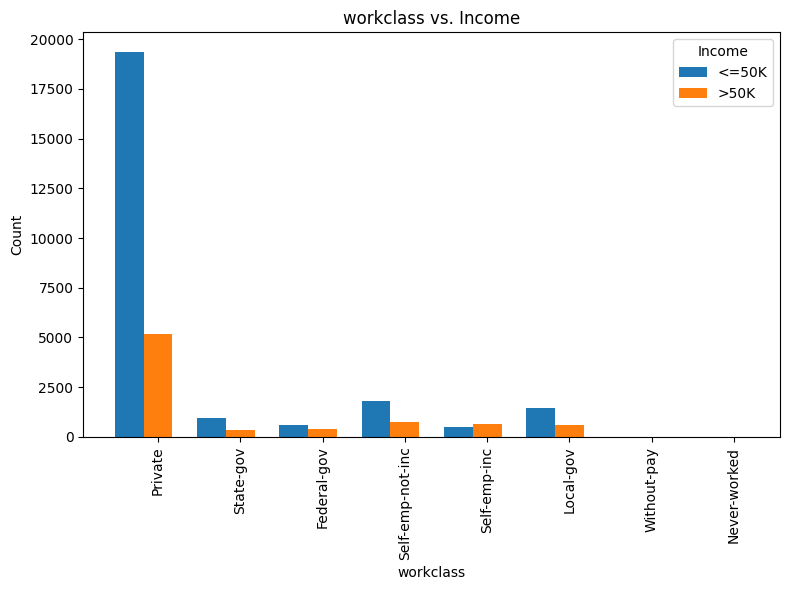

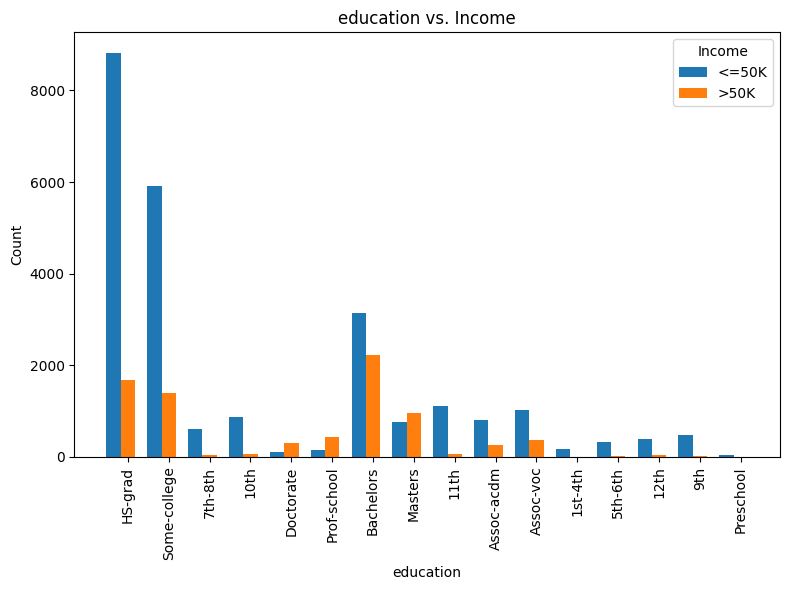

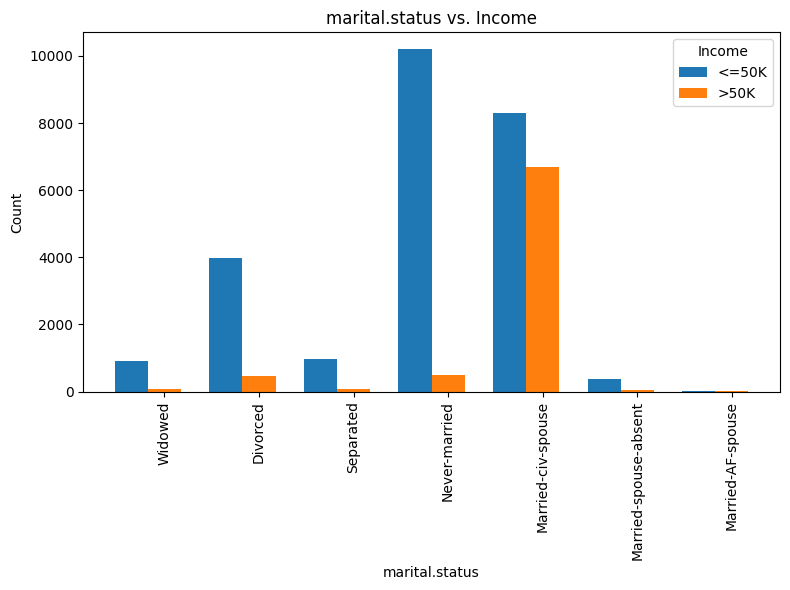

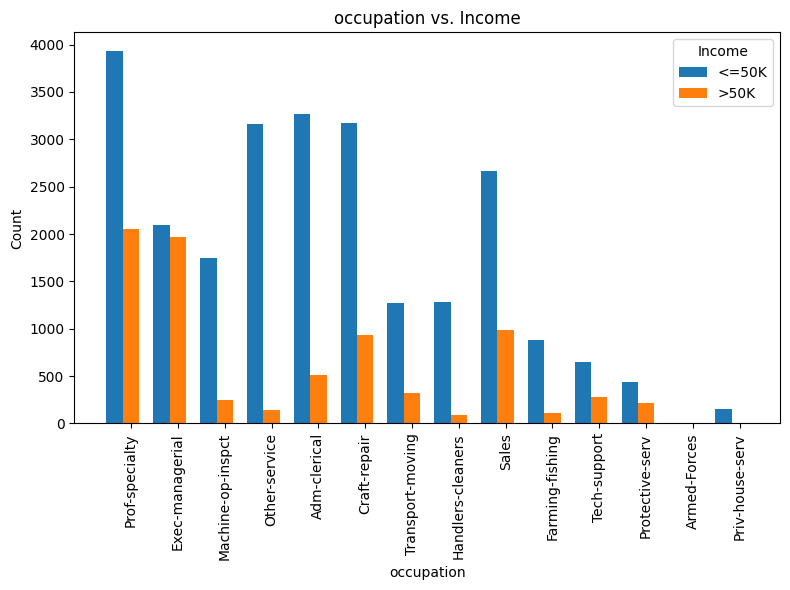

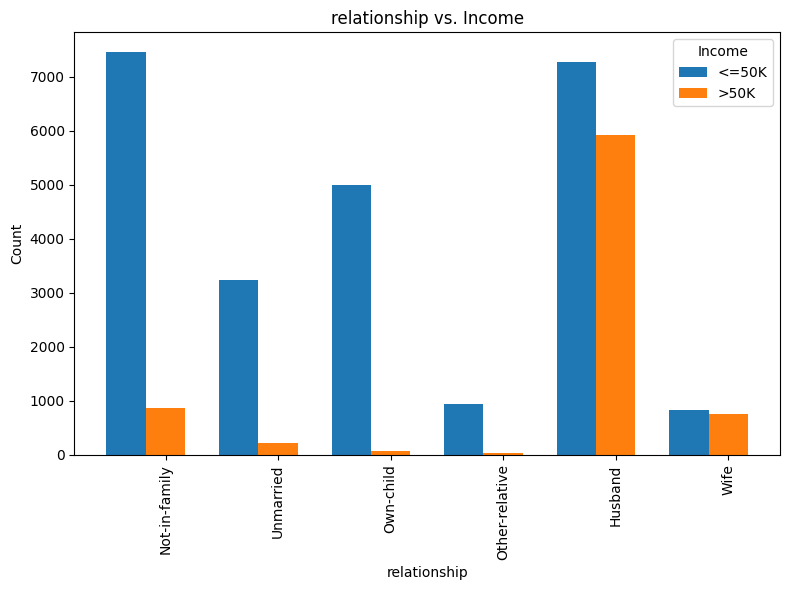

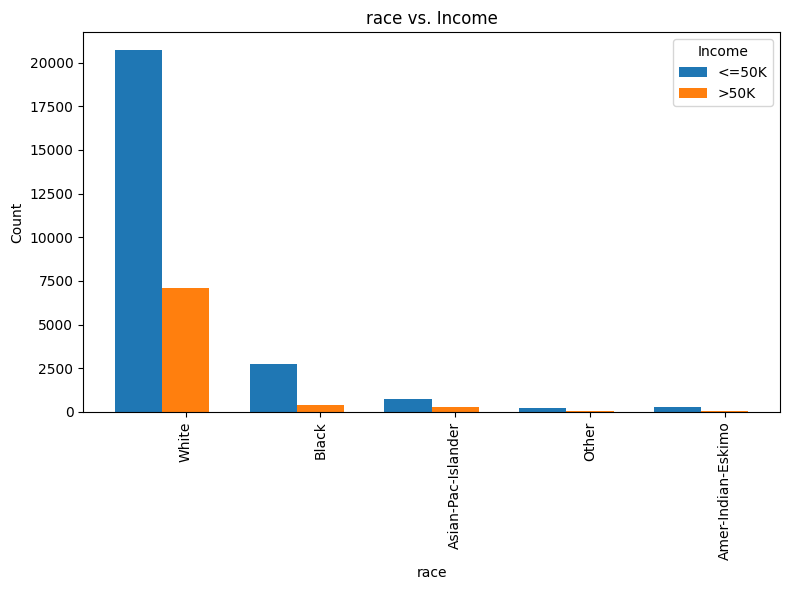

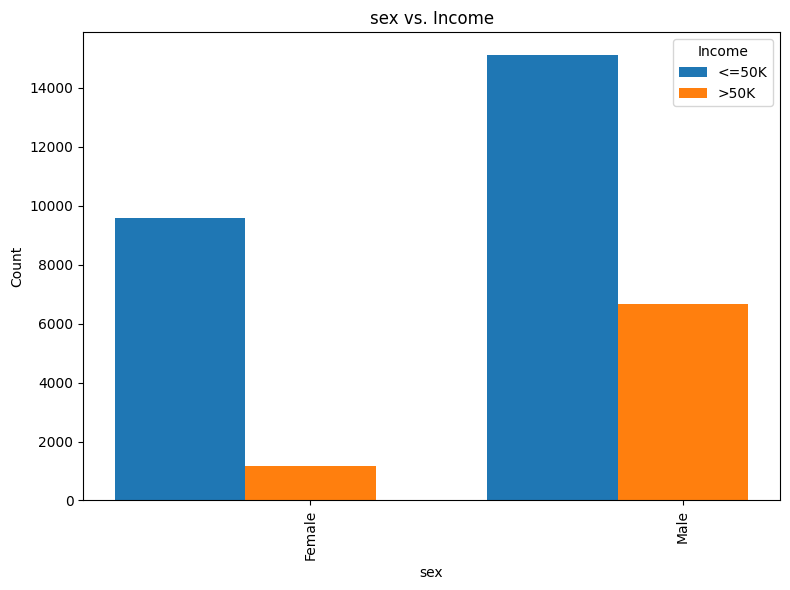

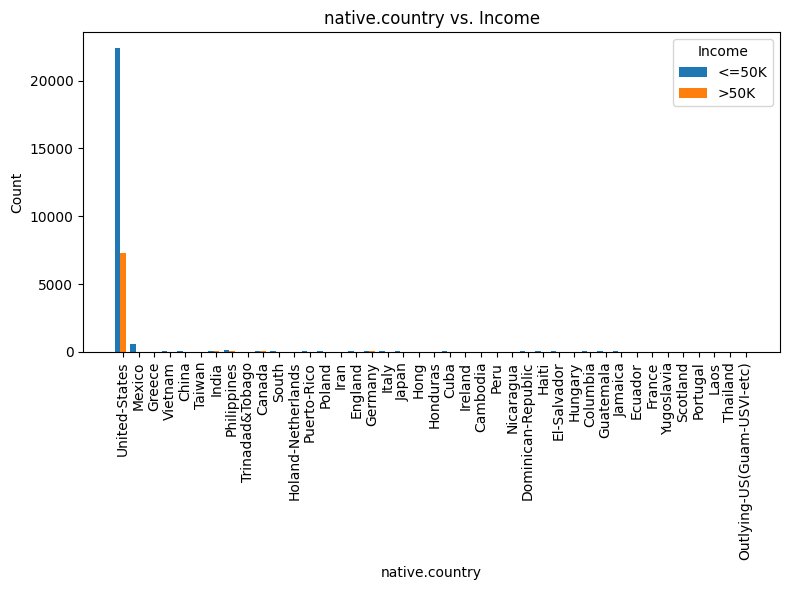

In [9]:
import matplotlib.pyplot as plt

# Filter columns with 'object' dtype, excluding 'income'
object_cols = df.select_dtypes(include='object').columns.drop('income')

# Iterate over each object column
for col in object_cols:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    categories = df[col].unique()
    bar_width = 0.35  # Width of each bar
    x = np.arange(len(categories))  # X-axis values for each category
    
    # Plot bars for each income level
    for i, income_level in enumerate(df['income'].unique()):
        df_filtered = df[df['income'] == income_level]
        counts = [len(df_filtered[df_filtered[col] == category]) for category in categories]
        plt.bar(x + i * bar_width, counts, width=bar_width, label=income_level)

    plt.title(f'{col} vs. Income')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(x + bar_width, categories, rotation=90)
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()

Based on this, there's a few observations that can be made:

* Most people in 1994 didn't make more than 50K a year.  However for certain categories such as being male, being married with a present spouse, being highly educated, working in the private sector give a greater indication that you probably made over 50K.

* When it comes to relationaships and occupations there's a pretty healthy distribution of data.  That can't be said for every category some of them are a little skewed one way


Next I want to create a histogram to take a look at age.

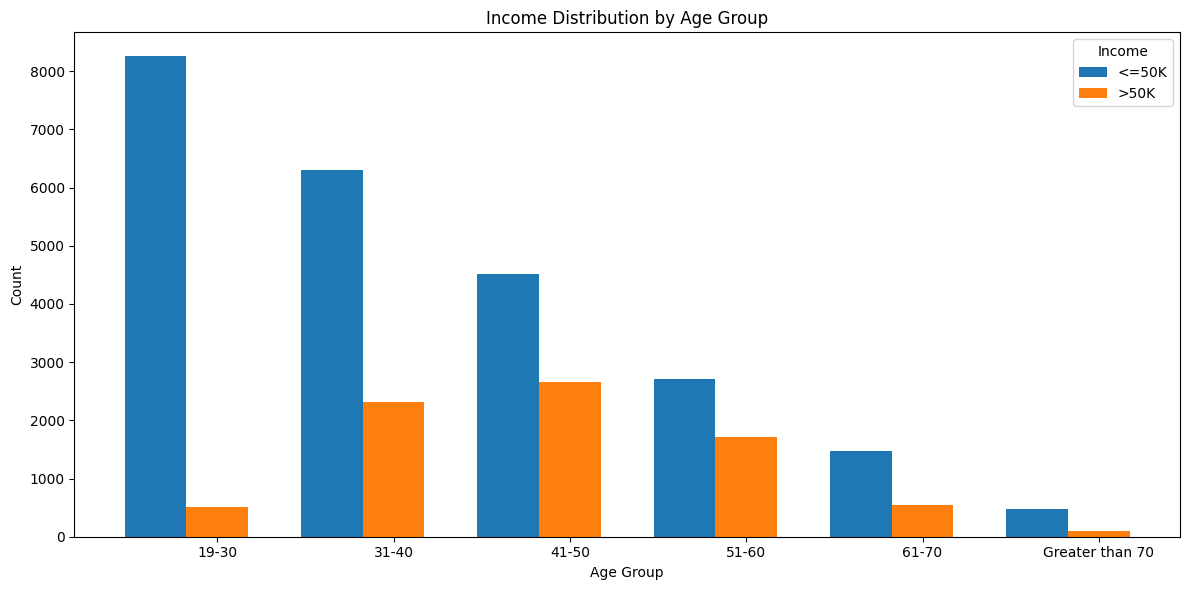

In [10]:
# Categorize age groups
bins = [19, 30, 40, 50, 60, 70, df['age'].max()]
labels = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Get counts of each income level for each age group
income_levels = df['income'].unique()
counts_by_age_group = {age_group: df[df['age_group'] == age_group]['income'].value_counts() for age_group in labels}

# Plot histogram
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(labels))

for i, income in enumerate(income_levels):
    counts = [counts_by_age_group[age_group].get(income, 0) for age_group in labels]
    plt.bar([pos + i * bar_width for pos in x], counts, bar_width, label=income)

plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks([pos + bar_width for pos in x], labels)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

Unsurprisingly, if you're working age and have probably spent most of your life working you're probably closer to making more than 50K.  

Next, I'm going to make a heatmap to see if there's any possible relationships.

In [11]:
# Print unique values in the 'income' column
print(df['income'].unique())

['<=50K' '>50K']


In [12]:
# Map '<=50K' to 0 and '>50K' to 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Convert 'income' column to int64
df['income'] = df['income'].astype('int64')

# Print unique values in the 'income' column to verify
print(df['income'].unique())

[0 1]


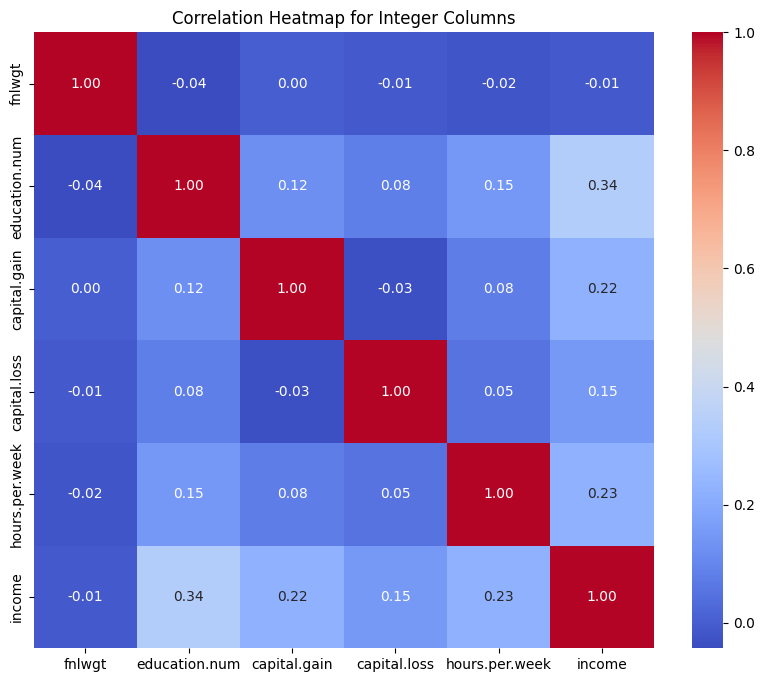

In [13]:
import seaborn as sns


# Select columns with 'int64' data type
int64_columns = df.select_dtypes(include=['int64']).drop(columns=['age'])

# Compute correlation matrix
correlation_matrix = int64_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Integer Columns')
plt.show()

Most of these categories have the strongest relationship with 'income' which makes sense since that's what I'm looking at.  Now, I'm going to do some label encoding/feature engineering in order to make improve the computation time for my models.

Some changes I'm going to make include making any education in high school and below the same option.  


In [14]:
#change the education for anything less than college to simplify
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'k-12')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  object  
 14  income          32561 non-null  int64   
 15  age_group       31573 non-null  category
dtypes: category(1), int64(7), object(8)
memory usage: 3.8+ MB


I wanted to check one more time becuase age_group is no longer needed, so I'll drop that.  

In [15]:
df.drop('age_group', inplace = True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# don't include numeric education column when creating test train split
categories = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

#create encoder
encoder = LabelEncoder()
for col in categories:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

# test train split 
x = df[['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

# split it up
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 313)

# import in the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

### Model Creation ### 
First I am going to start with Random Forest.  Random Forest classifiers are really good for just that, classifiying.  Remember, the goal is to predict if someone makes more than or less thank 50k dollars a year.  

Accuracy score for 10 trees: 0.8460003070781514
Accuracy score for 50 trees: 0.8529095654844158
Accuracy score for 100 trees: 0.8539843390142792
Accuracy score for 200 trees: 0.8552126516198373
Accuracy score for 300 trees: 0.8542914171656687
Accuracy score for 400 trees: 0.8542914171656687
Accuracy score for 500 trees: 0.8550591125441425
Accuracy score for 600 trees: 0.855366190695532
Accuracy score for 700 trees: 0.8544449562413634
Accuracy score for 800 trees: 0.8567480423767849
Accuracy score for 900 trees: 0.8549055734684478
Accuracy score for 1000 trees: 0.855980346998311


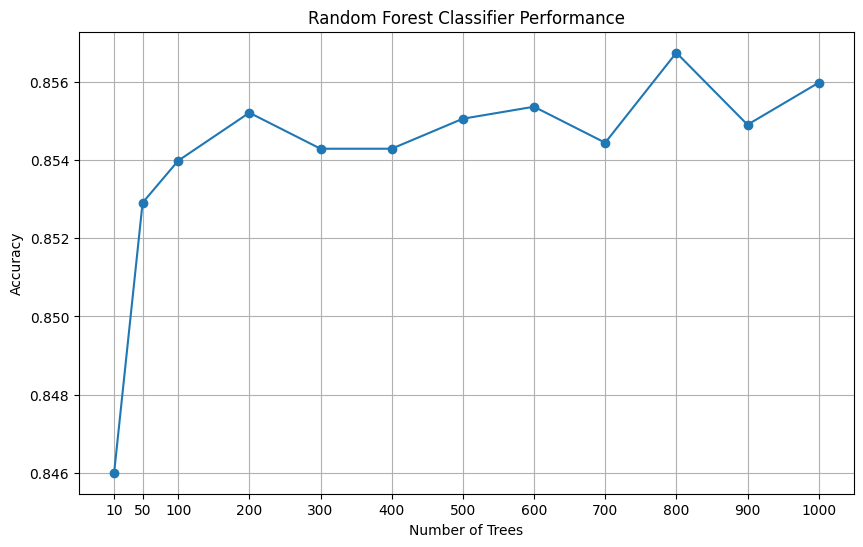

In [17]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# create a range of values for the number of trees in the forest
n_values = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# create a list of the accuracy scores
accuracy_scores = []

# iterate over the different values of trees
for n_value in n_values:
    rf_model = RandomForestClassifier(n_estimators = n_value, random_state = 313)
    
    # fit the model to the training data
    rf_model.fit(x_train, y_train)
    
    # make predictions
    y_pred_rf = rf_model.predict(x_test)
    
    # find the accuracy
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracy_scores.append(accuracy)
    
    #print the accuracy score of the current iteration
    print(f"Accuracy score for {n_value} trees: {accuracy}")
    
# plot the scores
plt.figure(figsize=(10,6))
plt.plot(n_values, accuracy_scores, marker = 'o')
plt.title('Random Forest Classifier Performance')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(n_values)
plt.show()

As you can see there's not that much of a difference in overall performance.  The graph is a little misleading because the lowest mumber of trees has an accuracy score of about 84.6% and the highest with even more trees is 85.6%.  So overall, this is a pretty consistent model but it needs to be compared between different types of models.  

Next, I'm going to be creating a KNN model.

Accuracy score for n_neighbors=3, metric = euclidean: 0.8102257024412713
Accuracy score for n_neighbors=3, metric = manhattan: 0.8136035621065562
Accuracy score for n_neighbors=5, metric = euclidean: 0.814985413787809
Accuracy score for n_neighbors=5, metric = manhattan: 0.8212805158912944
Accuracy score for n_neighbors=7, metric = euclidean: 0.8209734377399048
Accuracy score for n_neighbors=7, metric = manhattan: 0.8245048364808844
Accuracy score for n_neighbors=9, metric = euclidean: 0.82081989866421
Accuracy score for n_neighbors=9, metric = manhattan: 0.8275756179947796
Accuracy score for n_neighbors=11, metric = euclidean: 0.8246583755565792
Accuracy score for n_neighbors=11, metric = manhattan: 0.8288039306003377
Accuracy score for n_neighbors=13, metric = euclidean: 0.8225088284968525
Accuracy score for n_neighbors=13, metric = manhattan: 0.8309534776600644
Accuracy score for n_neighbors=15, metric = euclidean: 0.8229694457239367
Accuracy score for n_neighbors=15, metric = manha

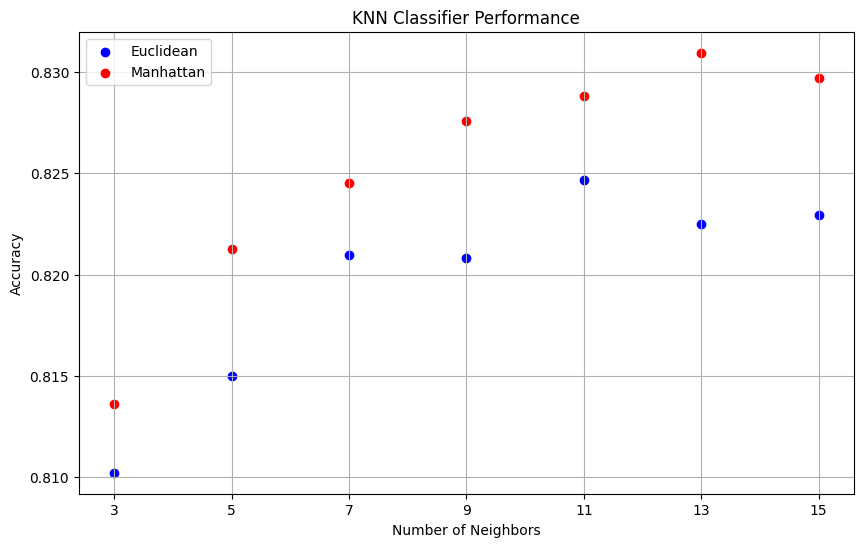

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# create a range of hyperparameters
n_neighbors_values = [3, 5, 7, 9, 11, 13, 15]
metric_values = ['euclidean', 'manhattan']

# accuracy score list
accuracy_scores = []

# iterate through the hyperparameters
for n_neighbors in n_neighbors_values:
    for metric in metric_values:
        
        #start model with current hyperparameters
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric = metric)
        
        # train the model
        knn_model.fit(x_train, y_train)
        
        # predict the testing set
        y_pred_knn = knn_model.predict(x_test)
        
        # find the accuracy
        accuracy = accuracy_score(y_test, y_pred_knn)
        
        # put the accuracy and hyperparameters into list
        accuracy_scores.append((n_neighbors, metric, accuracy))
        
        # show the results as things are iterated through
        print(f"Accuracy score for n_neighbors={n_neighbors}, metric = {metric}: {accuracy}")
        

# plot the results
plt.figure(figsize=(10, 6))
euclidean_scores = [(n_neighbors, accuracy) for n_neighbors, metric, accuracy in accuracy_scores if metric == 'euclidean']
manhattan_scores = [(n_neighbors, accuracy) for n_neighbors, metric, accuracy in accuracy_scores if metric == 'manhattan']

#plot each different kind
n_neighbors_euclidean, accuracy_euclidean = zip(*euclidean_scores)
plt.scatter(n_neighbors_euclidean, accuracy_euclidean, label = 'Euclidean', color = 'blue')

n_neighbors_manhattan, accuracy_manhattan = zip(*manhattan_scores)
plt.scatter(n_neighbors_manhattan, accuracy_manhattan, label = 'Manhattan', color = 'red')

plt.title('KNN Classifier Performance')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors_values)
plt.legend()
plt.grid(True)
plt.show()

Overall there is a pretty quick increase in performance as the number of neighbors goes up with the best score being 83%.  Manhattan also outperformed Euclidean each time.  This isn't surprising because Manhattan is best used for categorical data whereas Euclidean is better for continuous data.  However, it was still good to compare both.  

Next, I'll be making a decision tree to compare.

Accuracy score for max_depth = 1, min_samples_split=2: 0.7647781360356211
Accuracy score for max_depth = 1, min_samples_split=5: 0.7647781360356211
Accuracy score for max_depth = 1, min_samples_split=10: 0.7647781360356211
Accuracy score for max_depth = 1, min_samples_split=15: 0.7647781360356211
Accuracy score for max_depth = 1, min_samples_split=20: 0.7647781360356211
Accuracy score for max_depth = 1, min_samples_split=25: 0.7647781360356211
Accuracy score for max_depth = 5, min_samples_split=2: 0.826040227237832
Accuracy score for max_depth = 5, min_samples_split=5: 0.8261937663135268
Accuracy score for max_depth = 5, min_samples_split=10: 0.8261937663135268
Accuracy score for max_depth = 5, min_samples_split=15: 0.8261937663135268
Accuracy score for max_depth = 5, min_samples_split=20: 0.8261937663135268
Accuracy score for max_depth = 5, min_samples_split=25: 0.8261937663135268
Accuracy score for max_depth = 10, min_samples_split=2: 0.8461538461538461
Accuracy score for max_depth =

/tmp/ipykernel_33/471471554.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(min_samples_split_values))


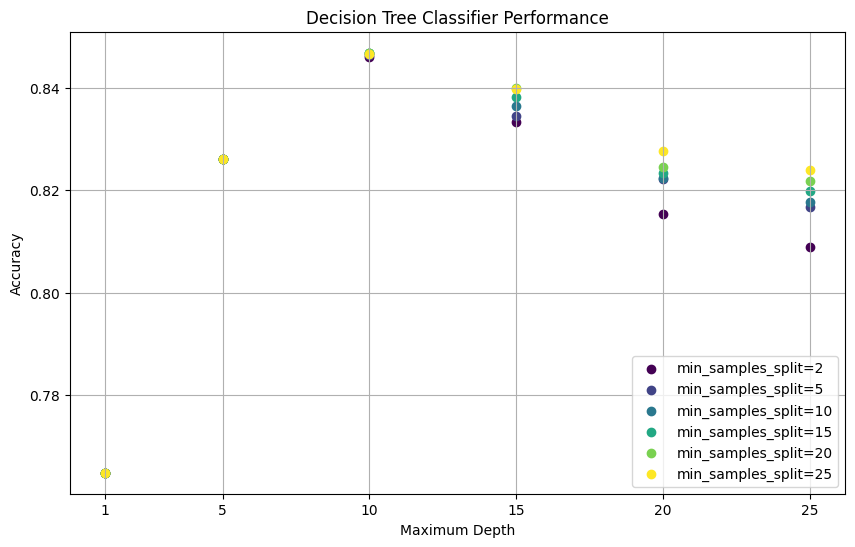

In [19]:
from sklearn.tree import DecisionTreeClassifier

# define range of hyperparameters
max_depth_values = [1, 5, 10, 15, 20, 25]
min_samples_split_values = [2, 5, 10, 15, 20, 25]

# create lists to store scores
accuracy_scores_dt = []

# iterate over the hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # create decision tree
        dt_model = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 313)
        
        # train model
        dt_model.fit(x_train, y_train)
        
        # make predictions
        y_pred_dt = dt_model.predict(x_test)
        
        # find accuracy
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        
        # store the accuracy and hyperparameters
        accuracy_scores_dt.append((max_depth, min_samples_split, accuracy_dt))
        
        # print the accuracy scores for each iteration
        print(f"Accuracy score for max_depth = {max_depth}, min_samples_split={min_samples_split}: {accuracy_dt}")
        
        
# plot the accuracy scores for different combinations
plt.figure(figsize=(10,6))
colormap = plt.cm.get_cmap('viridis', len(min_samples_split_values))

# iterate through hyperparameters
for i, min_samples_split in enumerate(min_samples_split_values):
    accuracy_subset = [(max_depth, accuracy) for max_depth, min_samples, accuracy in accuracy_scores_dt if min_samples == min_samples_split]
    max_depth_subset, accuracy_subset = zip(*accuracy_subset)
    plt.scatter(max_depth_subset, accuracy_subset, label=f'min_samples_split={min_samples_split}', color=colormap(i))
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

A maximum depth of 10 looks to have the best score, there's also more of a gap in overall performance through each iteration.  

Decision trees are very fast and this also had a pretty good score.  Next, I'm going to do some logistic regression.

Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, Accuracy: 0.7977890373099954
Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, Accuracy: 0.7968678028558268
Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, Accuracy: 0.797328420082911
Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, Accuracy: 0.7976354982343006
Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}, Accuracy: 0.796714263780132
Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, Accuracy: 0.7974819591586059
Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, Accuracy: 0.7976354982343006
Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}, Accuracy: 0.7976354982343006
Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}, Accuracy: 0.796714263780132
Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}, Accuracy: 0.7971748810072163
Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}, Accuracy: 0.7974819591586059


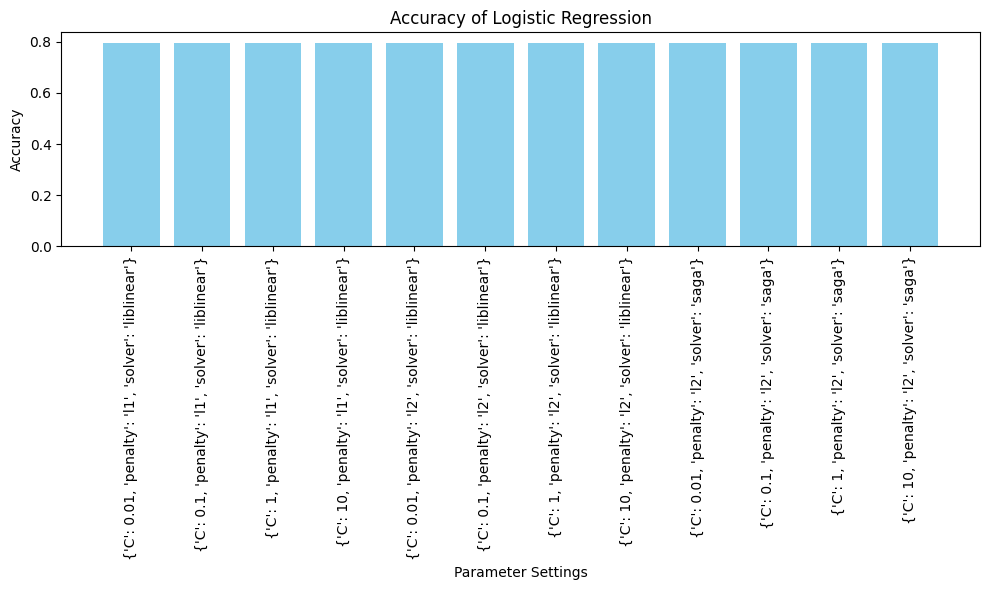

In [20]:
# load in logistic regression
from sklearn.linear_model import LogisticRegression

# define different parameters to try
parameters = [
    {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'},
    {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
    {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},
    {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'},
    {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
    {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'},
    {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'},
    {'C': 1, 'penalty': 'l2', 'solver': 'saga'},
    {'C': 10, 'penalty': 'l2', 'solver': 'saga'},
]

results = []
for params in parameters:
    model = LogisticRegression(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Parameters: {params}, Accuracy: {accuracy}")
    results.append({'params': params, 'accuracy': accuracy})
    
# extract parameters and accuracies for plotting
param_values = [str(params) for params in parameters]
accuracies = [result['accuracy'] for result in results]

# plot the results
plt.figure(figsize=(10, 6))
plt.bar(param_values, accuracies, color = 'skyblue')
plt.title('Accuracy of Logistic Regression')
plt.xlabel('Parameter Settings')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It doesn't appear that logistic regression does not do as good of a job as the other models that have already been created.  It also appears that there's not a lot of difference between the different parameters, they all yield about the same score.

The last model I'm going to create is going to be used making support vector machines (SVM).  

Accuracy score for C = 0.1, kernel = linear, gamma = 0.1: 0.7937970213419315
Accuracy score for C = 0.1, kernel = linear, gamma = 1: 0.7937970213419315
Accuracy score for C = 0.1, kernel = linear, gamma = 10: 0.7937970213419315
Accuracy score for C = 0.1, kernel = rbf, gamma = 0.1: 0.8076155381544603
Accuracy score for C = 0.1, kernel = rbf, gamma = 1: 0.7916474742822048
Accuracy score for C = 0.1, kernel = rbf, gamma = 10: 0.7647781360356211
Accuracy score for C = 1, kernel = linear, gamma = 0.1: 0.7937970213419315
Accuracy score for C = 1, kernel = linear, gamma = 1: 0.7937970213419315
Accuracy score for C = 1, kernel = linear, gamma = 10: 0.7937970213419315
Accuracy score for C = 1, kernel = rbf, gamma = 0.1: 0.8235836020267158
Accuracy score for C = 1, kernel = rbf, gamma = 1: 0.8171349608475357
Accuracy score for C = 1, kernel = rbf, gamma = 10: 0.7736834024259174
Accuracy score for C = 10, kernel = linear, gamma = 0.1: 0.7937970213419315
Accuracy score for C = 10, kernel = linear

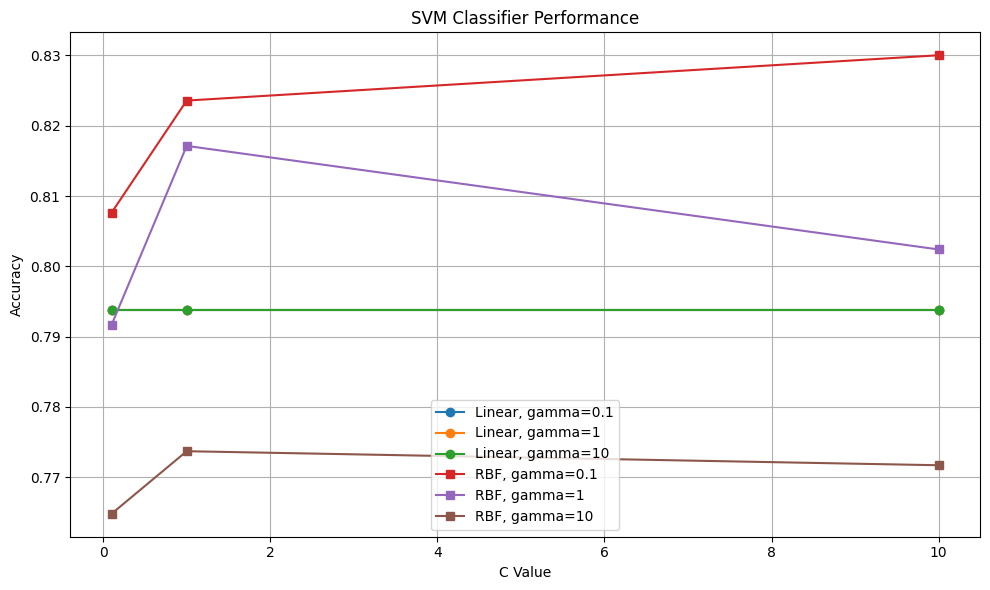

In [21]:
# bring in SVC
from sklearn.svm import SVC

# define ranges of parameters
C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf']
gamma_values = [0.1, 1, 10]

# accuracy list to plot 
accuracy_scores_svm = []
for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            # create model 
            svm_model = SVC(C=C, kernel=kernel, gamma=gamma, random_state = 313)
            
            # train model
            svm_model.fit(x_train, y_train)
            
            # make predictions
            y_pred_svm = svm_model.predict(x_test)
            
            # find the accuracy
            accuracy = accuracy_score(y_test, y_pred_svm)
            
            # store the accuracy scores and parameter combinations
            accuracy_scores_svm.append((C, kernel, gamma, accuracy))
            
            # print the scores
            print(f"Accuracy score for C = {C}, kernel = {kernel}, gamma = {gamma}: {accuracy}")
            
# Separate accuracy scores based on kernel and gamma values
linear_gamma_01 = [accuracy for C, kernel, gamma, accuracy in accuracy_scores_svm if kernel == 'linear' and gamma == 0.1]
linear_gamma_1 = [accuracy for C, kernel, gamma, accuracy in accuracy_scores_svm if kernel == 'linear' and gamma == 1]
linear_gamma_10 = [accuracy for C, kernel, gamma, accuracy in accuracy_scores_svm if kernel == 'linear' and gamma == 10]
rbf_gamma_01 = [accuracy for C, kernel, gamma, accuracy in accuracy_scores_svm if kernel == 'rbf' and gamma == 0.1]
rbf_gamma_1 = [accuracy for C, kernel, gamma, accuracy in accuracy_scores_svm if kernel == 'rbf' and gamma == 1]
rbf_gamma_10 = [accuracy for C, kernel, gamma, accuracy in accuracy_scores_svm if kernel == 'rbf' and gamma == 10]

# Plot the results
plt.figure(figsize=(10, 6))

# Plot linear kernel
plt.plot(C_values, linear_gamma_01, marker='o', label='Linear, gamma=0.1')
plt.plot(C_values, linear_gamma_1, marker='o', label='Linear, gamma=1')
plt.plot(C_values, linear_gamma_10, marker='o', label='Linear, gamma=10')

# Plot rbf kernel
plt.plot(C_values, rbf_gamma_01, marker='s', label='RBF, gamma=0.1')
plt.plot(C_values, rbf_gamma_1, marker='s', label='RBF, gamma=1')
plt.plot(C_values, rbf_gamma_10, marker='s', label='RBF, gamma=10')

plt.title('SVM Classifier Performance')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Internal Results ##
In summary, the best result for each model I have are as follows:

* SVM: C = 10, rbf, gamma = 0.1, 83% accuracy
* Random Forest: 800 trees, 85.67% accuracy
* KNN: Manhattan, 13 neighbors, 83.09% accuracy
* Decision Tree: max depth of 10, 20 sample split, 84.69% accuracy
* Logistic Regression: no varation between trials 79% accuracy

Given the non-linear and multiple decision boundaries of the data, it's no surprise that logistic regression performed the poorest out of all the different models.  More robust models like random forest and KNN deal with outliers better as well as non-linear decision boundaries.  So it makes sense that these models performed better however it is still important to compare and contrast each model.  

SVM was not computationally efficient, logistic regression had a noticeably lower score with little variation, so Decision Tree, KNN, and Random Forest are the best models to use.  

## Cross Comparions ##
Found from the University of San Diego computer science school, 3 students: Chet Lemon, Chris Zelazo, and Kesav Mulakaluri used this same dataset to measure how effective how several of their models were at classification.  Here was their testing accuracy:

* Naive Bayes: 79.568%
* Naive Bayes (grouped): 75.872%
* Logistic Regression: 61.388%
* Decision Tree: 85.222%

Link: https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

Found on Kaggle, IPByrne created a random forest classifier that had 84.3% accuracy.
Link: https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

Also found on Kaggle, Sumit Mishra had the following models with the following accuracies:
* Logistic Regression: 78.59%
* Random Forest: 86%
* Boosted Gradient: 86.87%
* Bernoulli Naive Bayes: 72.9%
* Support Vector: 40.33%

Link: https://www.kaggle.com/code/sumitm004/eda-and-income-predictions-87-36-accuracy/notebook#Machine-Learning-Models

Found on Kaggle, Nathan Amar had the following accuracies with the following models:
* Logistic Regression: 79.7%
* Naive Bayes: 72.4%
* Decision Tree: 80.9%
* Random Forest: 81.8%


# Conclusion #
Overall, there was not a massive range in differences between each model that I made.  There also weren't huge differences between models that other people made either, for the most part.  Given that all of these models are designed to work with classification, that makes sense!

The next steps and potential future work that can be done for these models would be to look at other scores such as f1, or to do even more extreme hyperparameter tuning.  